# Cervical Cancer Prediction

In [1]:
#Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading and Understanding the data
df=pd.read_csv('cervical.csv')

In [3]:
df.head(10)

,Unnamed: 0,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,...,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,...,0.0,0,1,0,1,0,0,0,0,0
3,4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,...,0.0,0,0,0,0,0,0,0,0,0
4,5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,...,0.0,0,0,0,0,0,1,1,0,1
6,7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,...,0.0,0,0,0,0,0,0,0,0,0
7,8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0,1,0,1,1,0,0,0,0
8,9,44,3.0,15.0,8.0,1.0,1.266973,2.8,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
9,10,44,3.0,26.0,4.0,0.0,0.000000,0.0,1.0,2.0,...,0.0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD',
       'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',
       'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis',
       'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis',
       'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes',
       'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV',
       'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer',
       'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology',
       'Biopsy'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          838 non-null    int64  
 1   Age                                 838 non-null    int64  
 2   No_of_sex_partner                   838 non-null    float64
 3   First_sexual_intercourse            838 non-null    float64
 4   No_pregnancies                      838 non-null    float64
 5   Smokes                              838 non-null    float64
 6   Smokes_yrs                          838 non-null    float64
 7   Smokes_packs_yr                     838 non-null    float64
 8   Hormonal_Contraceptives             838 non-null    float64
 9   Hormonal_Contraceptives_years       838 non-null    float64
 10  IUD                                 838 non-null    float64
 11  IUD_years                           838 non-n

In [6]:
#Checking dimension
df.shape


(838, 35)

In [7]:
## replace ? with NaN
df = df.replace('?', np.NaN)

In [8]:
df.isnull().sum()

Unnamed: 0                            0
Age                                   0
No_of_sex_partner                     0
First_sexual_intercourse              0
No_pregnancies                        0
Smokes                                0
Smokes_yrs                            0
Smokes_packs_yr                       0
Hormonal_Contraceptives               0
Hormonal_Contraceptives_years         0
IUD                                   0
IUD_years                             0
STDs                                  0
STDs_number                           0
STDs_condylomatosis                   0
STDs_cervical_condylomatosis          0
STDs_vaginal_condylomatosis           0
STDs_vulvo_perineal_condylomatosis    0
STDs_syphilis                         0
STDs_pelvic_inflammatory_disease      0
STDs_genital_herpes                   0
STDs_molluscum_contagiosum            0
STDs_AIDS                             0
STDs_HIV                              0
STDs_Hepatitis_B                      0


In [9]:
x_features = df.columns.tolist()

In [10]:
x_features_categorical=[
 'Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis','STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis','STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS','STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx']
x_features_categorical

['Smokes',
 'Hormonal_Contraceptives',
 'IUD',
 'STDs',
 'STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV',
 'Dx_Cancer',
 'Dx_CIN',
 'Dx_HPV',
 'Dx']

In [11]:
x_features_numerical=[i for i in x_features if i not in x_features_categorical]
x_features_numerical

['Unnamed: 0',
 'Age',
 'No_of_sex_partner',
 'First_sexual_intercourse',
 'No_pregnancies',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'Hormonal_Contraceptives_years',
 'IUD_years',
 'STDs_number',
 'STDs_No_of_diagnosis',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

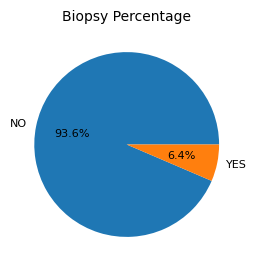

In [12]:
impute = df.copy()
impute=df.astype('float')

plt.figure(figsize = (9,3))
plt.pie(impute['Biopsy'].value_counts(), labels = ['NO', 'YES'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 8})
plt.title('Biopsy Percentage', fontsize=10)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Define the features and target variable
x_features = df.drop(columns=['Dx_Cancer'])  # Replace 'Dx_Cancer' with your target variable name
y = df['Dx_Cancer']  # This is the target variable indicating cervical cancer diagnosis

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size=0.2, random_state=0)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Fit the model on the training data
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [19]:
# Make predictions on the test data
predictions = rf_model.predict(x_test)

In [25]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Example data preparation (replace with your actual data)
# x = your_feature_data
# y = your_target_data
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0, class_weight='balanced')
rf_model.fit(x_train, y_train)

# Make predictions
predictions = rf_model.predict(x_test)

# Recalculate metrics
f1 = f1_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Print results
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.0
Accuracy: 0.9880952380952381
Confusion Matrix:
[[166   0]
 [  2   0]]


### Conclusion

-  F1 score of 0.0 indicates that the model has not successfully predicted any positive cases of cervical cancer. This means that the model has failed to balance precision and recall for the positive class.
-  The accuracy is very high, which suggests that the model is correctly identifying the majority of cases (in this case, negative cases). However, high accuracy in this scenario is misleading because it doesn't reflect the model's ability to identify positive cases.

##### End of Report